## Import Library dan Dataset

In [29]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] 
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Import Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

# baca data
print(data.head())
print('')
print(data.tail())

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

     CustomerID  Gender  Age  Annual Income  Spending Score
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83


## Eksplorasi Data

In [3]:
data.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Cek missing value
print(data.isnull().sum())
print('--------------')
print(data.isna().sum())

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
--------------
CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64


Hasilnya: tidak ada missing value

Female    112
Male       88
Name: Gender, dtype: int64

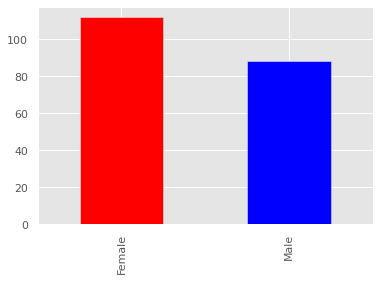

In [30]:
# Diagram batang atribut Gender

data['Gender'].value_counts().plot.bar(color=('red','blue'))
data['Gender'].value_counts()

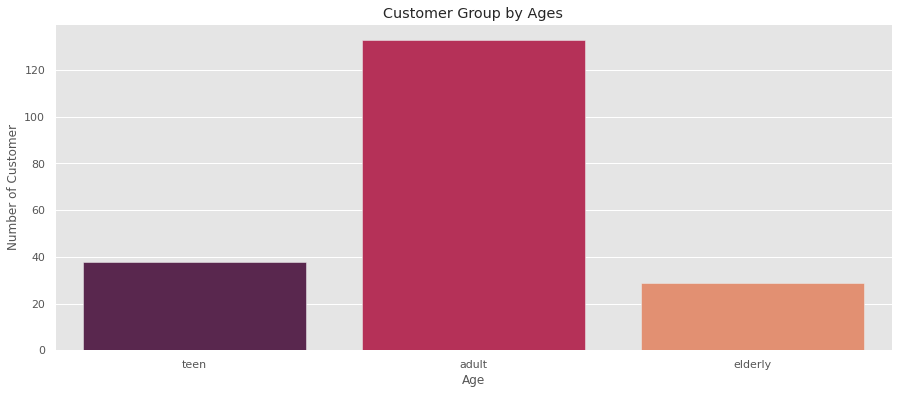

[38, 133, 29]

In [31]:
# Persebaran Data berdasarkan pengelompokkan Usia
# Remaja (Teen) = usia 14-25
# Dewasa (Adult) = usia 26-55
# Lanjut Usia (Elderly) = usia 56 keatas

teen = data.Age[(data.Age <= 25) & (data.Age >= 14)]
adult = data.Age[(data.Age <= 55) & (data.Age >= 26)]
elderly = data.Age[data.Age >= 56]

xgroup = ["teen","adult","elderly"]
ygroup = [len(teen.values),len(adult.values),len(elderly.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=xgroup, y=ygroup, palette="rocket")
plt.title("Customer Group by Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()
ygroup

Hasilnya: 
Teen = 38 pelanggan,
Adult = 133 pelanggan,
Elderly = 29 pelanggan

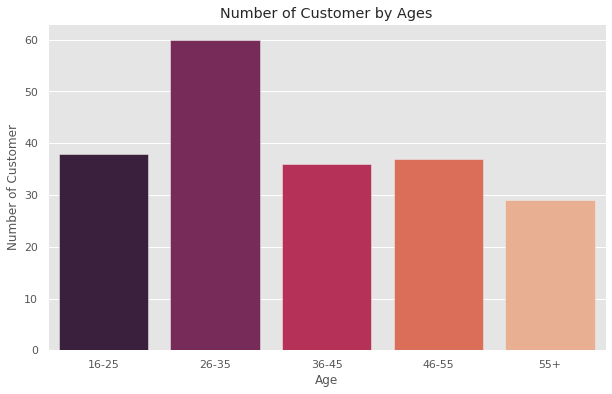

[38, 60, 36, 37, 29]

In [32]:
# Distribusi Pelanggan berdasarkan rentang usia

age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 16)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55keatas = data.Age[data.Age >= 56]

x = ["16-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55keatas.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer by Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()
y

Hasil:
16-25 : 38 pelanggan,
26-35 : 60 pelanggan,
36-45 : 36 pelanggan,
46-55 : 37 pelanggan,
55++ : 29 pelanggan

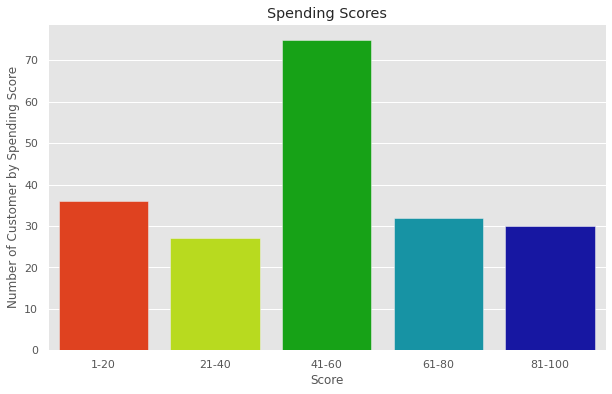

[36, 27, 75, 32, 30]

In [33]:
# Distribusi Pelanggan berdasarkan Spending Score

ss1_20 = data["Spending Score"][(data["Spending Score"] >= 1) & (data["Spending Score"] <= 20)]
ss21_40 = data["Spending Score"][(data["Spending Score"] >= 21) & (data["Spending Score"] <= 40)]
ss41_60 = data["Spending Score"][(data["Spending Score"] >= 41) & (data["Spending Score"] <= 60)]
ss61_80 = data["Spending Score"][(data["Spending Score"] >= 61) & (data["Spending Score"] <= 80)]
ss81_100 = data["Spending Score"][(data["Spending Score"] >= 81) & (data["Spending Score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer by Spending Score")
plt.show()
ssy

### Boxplot

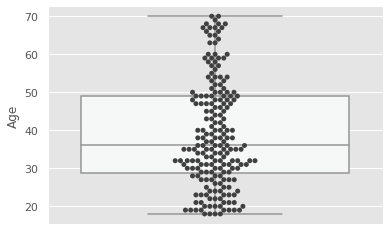

In [34]:
# untuk ngecek outlier
# pertama pake visual boxplot

sns.boxplot(y= data['Age'], palette="RdBu"), 
sns.swarmplot(y= data['Age'], color=".25")


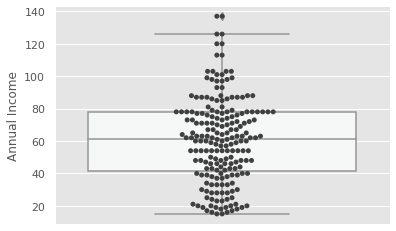

In [35]:
sns.boxplot(y= data['Annual Income'], palette="RdBu")
sns.swarmplot(y= data['Annual Income'], color=".25")

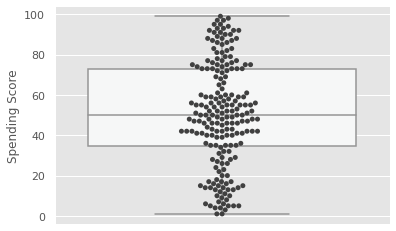

In [36]:
sns.boxplot(y= data['Spending Score'], palette="RdBu")
sns.swarmplot(y= data['Spending Score'], color=".25")

Hasil boxplot: Annual Income Outlier. Untuk mastikannya, pake standarisasi data

In [14]:
a3 = data.iloc[:,[2,3,4]]

In [15]:
# Standarisasi Data

scaler = StandardScaler().fit(a3)
std = scaler.transform(a3)

# bikin data untuk nyimpan hasil standarisasi data
data_std = pd.DataFrame(std)

# rename kolomnya
data_std.rename(columns = {0:"Std Age", 
                         1:"Std Annual Income", 
                         2: "Std Spending Score"}, inplace = True)

# gabungkan data std dengan data awal
data2 = pd.concat([data,data_std], axis = 1)
data2.tail()

,CustomerID,Gender,Age,Annual Income,Spending Score,Std Age,Std Annual Income,Std Spending Score
195,196,Female,35,120,79,-0.276302,2.268791,1.118061
196,197,Female,45,126,28,0.441365,2.497807,-0.861839
197,198,Male,32,126,74,-0.491602,2.497807,0.923953
198,199,Male,32,137,18,-0.491602,2.917671,-1.250054
199,200,Male,30,137,83,-0.635135,2.917671,1.273347


In [16]:
# min max nilai standarisasi Annual Income

data_std["Std Annual Income"].min() , data_std["Std Annual Income"].max()

(-1.7389991930659485, 2.9176711658902788)

Nilai standarisasi data baris ke 199 dan 200 yang terdeteksi outlier ternyata tidak lebih dan kurang dari nilai max dan min Annual Income std. Berarti nggak ada outlier

## Visualisasi Data

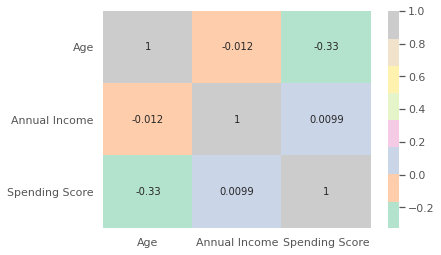

In [37]:
# korelasi antar variable

def customer_corr(data):
  correlation = data.corr()
  fig = plt.gcf()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="Pastel2")

customer_corr(a3)

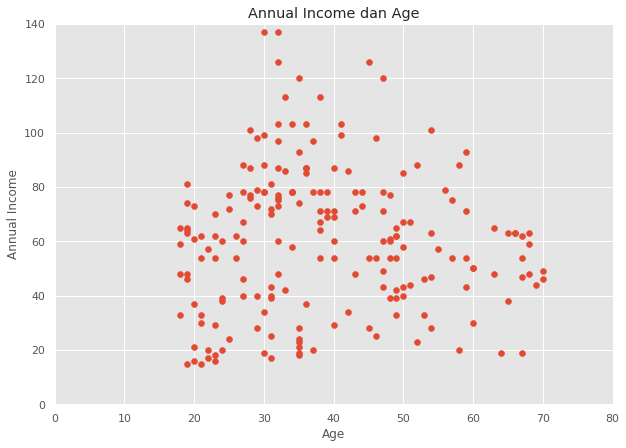

In [38]:
# Untuk melihat persebaran data antar atribut untuk melihat mana yang paling cocok di klasterkan

# Annual Income dan Age
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(data["Age"], data["Annual Income"])
ax.set(title = "Annual Income dan Age", xlabel = "Age", ylabel = "Annual Income");

ax.set_xlim(0,80)
ax.set_ylim(0,140);

hasil: nggak terlihat jelas klasternya

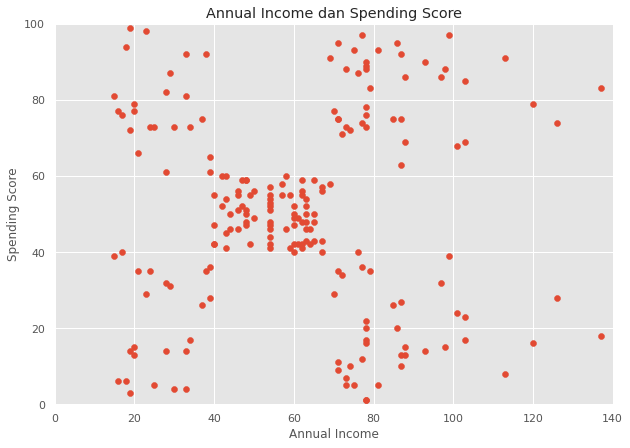

In [39]:
#  Annual Income dan Spending Score

fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(data["Annual Income"], data["Spending Score"])
ax.set(title = "Annual Income dan Spending Score", xlabel = "Annual Income", ylabel = "Spending Score");

ax.set_xlim(0,140)
ax.set_ylim(0,100);

hasil: terlihat dengan jelas kemiripan dan memungkinkan untuk di klasterkan (ini yang dipake)


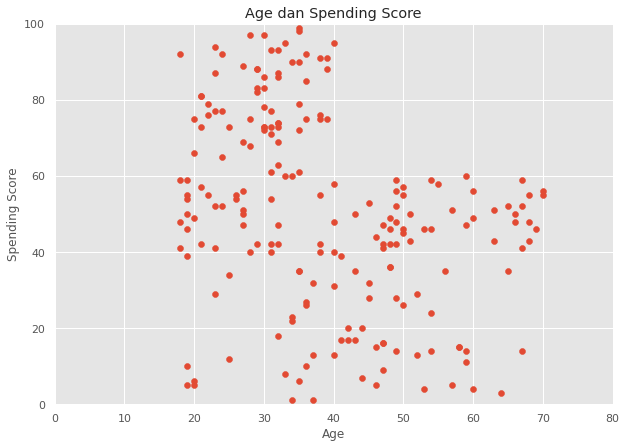

In [40]:
# Age dan Spending Score

fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(data["Age"],data["Spending Score"])
ax.set(title = "Age dan Spending Score", xlabel = "Age", ylabel = "Spending Score");

ax.set_xlim(0,80)
ax.set_ylim(0,100);

hasil: terlihat kemungkinan pengklasterannya

## Elbow Method

In [21]:
a2 = data.iloc[:,[3,4]].values

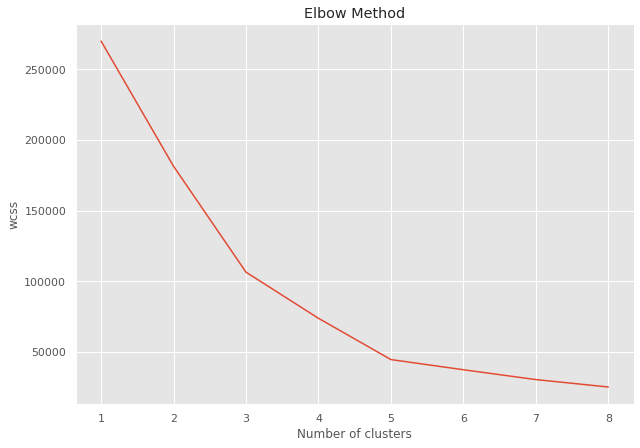

In [41]:
fig, ax = plt.subplots(figsize = (10,7))

wcss = []
for i in range(1,9):
  km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  km.fit(a2)
  wcss.append(km.inertia_)
plt.plot(range(1,9),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


Hasil elbow method: kemungkinannya adalah jumlah klaster 3 atau jumlah klaster 5

## Analisis Silhouette

In [23]:
from sklearn.metrics import  silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, init='k-means++',
                     max_iter=300, n_init=10, random_state=0)
  y_means = clusterer.fit_predict(a2)
  silhouette_avg = silhouette_score(a2, y_means)
  print("jumlah klaster =", n_clusters,
        ", nilai average_silhoutte =", silhouette_avg)

jumlah klaster = 2 , nilai average_silhoutte = 0.2968969162503008
jumlah klaster = 3 , nilai average_silhoutte = 0.46761358158775435
jumlah klaster = 4 , nilai average_silhoutte = 0.4931963109249047
jumlah klaster = 5 , nilai average_silhoutte = 0.553931997444648
jumlah klaster = 6 , nilai average_silhoutte = 0.5393922132561455
jumlah klaster = 7 , nilai average_silhoutte = 0.5270287298101395
jumlah klaster = 8 , nilai average_silhoutte = 0.4575689106804838
jumlah klaster = 9 , nilai average_silhoutte = 0.4565077334305076


Hasilnya: jumlah klaster optimal adalah 5 klaster

##KMeans Clustering

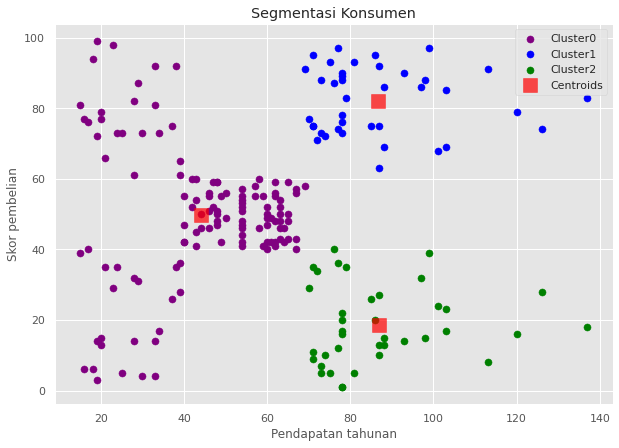

In [42]:
fig, ax = plt.subplots(figsize = (10,7))

##k=3
km3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km3.fit_predict(a2)

#Visualisasi untuk k=5
plt.scatter(a2[y_means==0,0], a2[y_means==0,1], s=50, c='purple', label='Cluster0')
plt.scatter(a2[y_means==1,0], a2[y_means==1,1], s=50, c='blue', label='Cluster1')
plt.scatter(a2[y_means==2,0], a2[y_means==2,1], s=50, c='green', label='Cluster2')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], s=200, marker='s',
            c='red', alpha=0.7, label='Centroids')
plt.title('Segmentasi Konsumen')
plt.xlabel('Pendapatan tahunan')
plt.ylabel('Skor pembelian')
plt.legend()
plt.show()


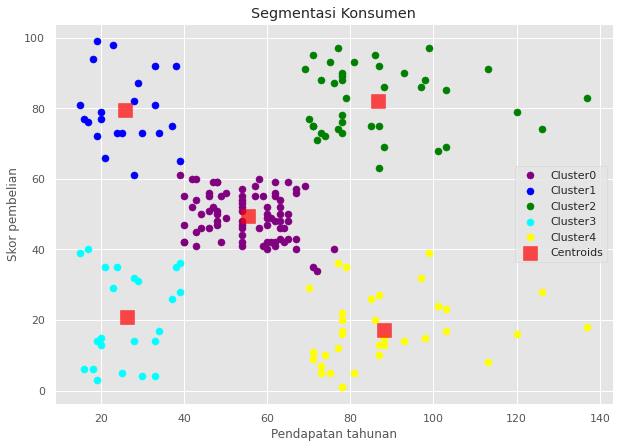

In [43]:
 fig, ax = plt.subplots(figsize = (10,7))

##k=5
km5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means5 = km5.fit_predict(a2)

#Visualisasi untuk k=5
plt.scatter(a2[y_means5==0,0], a2[y_means5==0,1], s=50, c='purple', label='Cluster0')
plt.scatter(a2[y_means5==1,0], a2[y_means5==1,1], s=50, c='blue', label='Cluster1')
plt.scatter(a2[y_means5==2,0], a2[y_means5==2,1], s=50, c='green', label='Cluster2')
plt.scatter(a2[y_means5==3,0], a2[y_means5==3,1], s=50, c='cyan', label='Cluster3')
plt.scatter(a2[y_means5==4,0], a2[y_means5==4,1], s=50, c='yellow', label='Cluster4')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1], s=200, marker='s',
            c='red', alpha=0.7, label='Centroids')
plt.title('Segmentasi Konsumen')
plt.xlabel('Pendapatan tahunan')
plt.ylabel('Skor pembelian')
plt.legend()
plt.show()

In [26]:
data_cluster = pd.concat([data, pd.DataFrame(y_means5)], axis = 1).rename(columns = {0:"Cluster"})
data_cluster.tail()

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4
199,200,Male,30,137,83,2


In [27]:
data_cluster.groupby("Cluster").count()

,CustomerID,Gender,Age,Annual Income,Spending Score
Cluster,,,,,
0,81,81,81,81,81
1,22,22,22,22,22
2,39,39,39,39,39
3,23,23,23,23,23
4,35,35,35,35,35


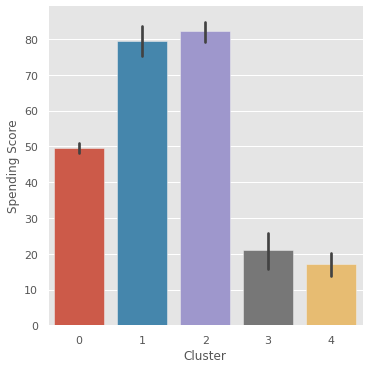

In [44]:
sns.catplot(x='Cluster', y = 'Spending Score', kind ='bar', data=data_cluster)